# Prediction using Decision Tree Algorithm
## Dataset Link : https://bit.ly/3kXTdox

_The above dataset is Iris which has columns_ 
1. Id 
2. SepalLengthCm
3. SepalWidthCm
4. PetalLengthCm
5. PetalWidthCm
6. Species

## Problem Statement
- _Build a decision tree for classification and regression of your own case study._
- _From the given 'Iris' dataset predict the optimum number of clusters and represent its visualization_


In [ ]:
## Importing all Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
## Loading the Iris dataset and making a Data Frame of Iris dataset
df = pd.read_csv('/content/drive/MyDrive/datasets/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
## No. of Rows and Columns
df.shape

(150, 6)

### Basic EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
## Finding out the Mean, Median and Quartile Range
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
## Checking the duplicate values
df.duplicated().sum()

0

## Splitting the dataset  

In [ ]:
## Features
X = df.drop(['Id','Species'],axis=1)
## Target
y = df['Species']

## Train Test Split

In [ ]:
## Importing
from sklearn.model_selection import train_test_split

## splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

In [ ]:
## chechking how the split is done
X.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape

((150, 4), (120, 4), (30, 4), (150,), (120,), (30,))

## Training the Decision Tree Classifier model on the Training dataset

In [ ]:
## Importing the Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)

##fit the model on train data set
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
## predict the model on decision tree
y_predict = classifier.predict(X_test)

## Performance Matrix

In [ ]:
## Importing all libraries
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, cohen_kappa_score

In [ ]:
## Checking the Accuracy
print('Accuracy Score: ',accuracy_score(y_test,y_predict))

Accuracy Score:  1.0


<Axes: >

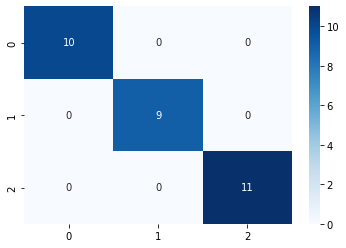

In [ ]:
## Confusion Matrix
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,cmap='Blues',cbar=True)

In [ ]:
## Kappa Score
print('Kappa Score: ', cohen_kappa_score(y_test,y_predict))

Kappa Score:  1.0


In [ ]:
## Classification Report: Precision, Recall, F1-Score, Support
print(classification_report(y_test,y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## Visualising the Descision Tree Classifier Model

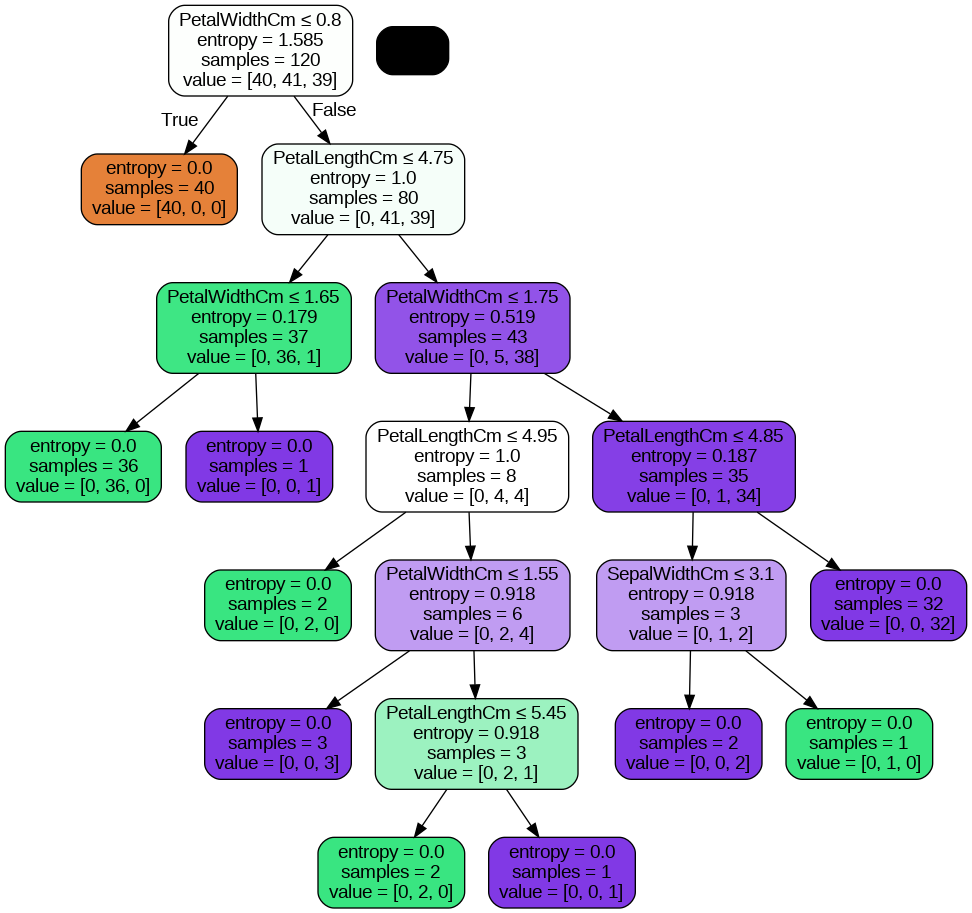

In [ ]:
# Import necessary libraries for graph viz
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, feature_names=X.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())